# Dragonfruit Software Engineering Challenge


## Solution to Question 1

We have to generate images for each microorganism, which are of dimensions 100,000 x 100,000. For each such microbe, there are two different images - one for the body, and the other for the dye. These images can be depicted as white coloured surroundings, and black colour to show the body/dye.

The following strategy has been considered to approach the problem of image generation:

- Due to very large dimensionality of the images, the representation through direct matrices would be highly memory intensive, and also computationally inefficient. So we need to look for a better approach.
- The images of the body can be considered to be a continuous, connected, arbitrarily shaped object (like a "blob"), rather than multiple discreet disconnected components. This condition can be named "connectedness".
- We can make use of RLE (Run Length Encoding) to represent a series of 0s or 1s, where 0 represents "white pixel" and 1 represents "black pixel". Through RLE, each row of pixels can be represented in a compressed manner.
- To simplify the boundary problems, we can make the assumption that each row of our image can be broken up into a series of pixels of the form: "---0s--- | ---1s--- | ---0s---".
- To ensure the condition of "connectedness" is followed (for the image of the body), the series of "1s" in every successive row should contain at least one "1" whose column position lies in the range of columns of the "1s" in the preceeding row.

Thus, this connected RLE model can help us generate image representations. An example of such an image is shown in a figure given below (Note that the apparent gaps betweeen the black lines in the image are just there for clarity, and in an actual image there is no gap between two rows, so that whole object would appear to be one continuous, connected, arbitrary shape). The RLE encoding we described above will thus allow us to represent this kind of an image.

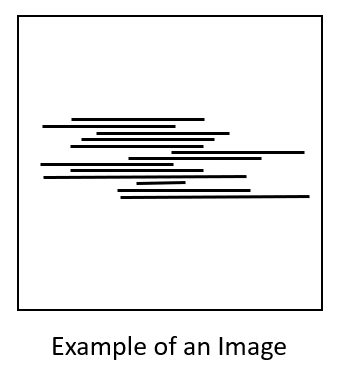

Next, we need to fulfill another criteria for our images - i.e., for the case of body images, the body must cover at least 25% of the image area. In our encoding, that means the total number of 1s in the image should be at least 25% of all the numbers. This condition can be met mathematically as follows:

Let, $N = 100000$. Then our image is represented by $N$ rows, each having $N$ numbers in total.
In each row, there will be a series of 1s in the middle, the length of which would be random. Since there are a very large number of such rows, we can make use of the expectation value of the length of the series of 1s in each row. Mathematically, for a row with $N$ length, the expectation value (i.e., average) of the length of 1s will be $\dfrac{N}{3}$.

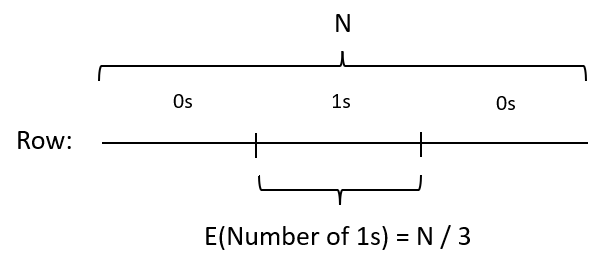

Now, the total area of our region - i.e., the total numbers in the whole image - will be equal to $N^2$. So, the minimum number of rows (say, $d$) that the object should cover, can be determined by the following:

$\left(\dfrac{N}{3}\right)d = \dfrac{N^2}{4}\\$
Thus, $d = \dfrac{3N}{4}$

Based on this, the whitespace region above and below the object, can cover a total number of rows (at max) = $N - \dfrac{3N}{4} = \dfrac{N}{4}$. Thus, we can randomly select two numbers representing the first row (of the object) and the last row (of the object), such that the value of first row lies in the range $\left(0, \dfrac{N}{8}\right)$ and that of last row lies in the range $\left(\dfrac{7N}{8}, N\right)$. This way, even in the worst case, we get an expectation value of 25% of total area covered by the object. For the case of the dye image, we need not have any whitespace at the top or bottom, and can draw the rows in the entire image, since we don't have any such condition on the area.

**Run Length Encoding (RLE) Method Used**

Here, since we only have to represent the lengths of the sequences of 0s, 1s and 0s (in this exact fixed order), we can employ the following simple style of encoding for a row:

$\text{Row RLE} = [x, y, z]$

where x, y, and z are the lengths of the sequences of 0s, 1s and 0s respectively, and they follow the condition that, $x + y + z = N$.

### Storage space used by Images

In this method, by representing each row of the image through a run length encoding, we have essentially reduced the memory complexity of our problem from $O(N^2)$ to $O(N)$, since an overall $3N$ amount of space is used up by the image array thus generated. This also consequently reduces the time complexity of all algorithms that need to be performed here, since they get reduced to $O(N)$ time complexity.

**Byte storage used by image representation**

Considering the image to be a 2D integer array of dimensions $N \times 3$, where $N = 100000$, we can find the total worst-case storage required as follows:

- Size of int = 4 bytes.
- Thus, worst case storage space = $100000 \times 3 \times 4 \text{ bytes} = 1.2 \times 10^6 \text{ bytes} = 1.2 \text{ MB}$

## Solution to Question 2

In [39]:
import random
import numpy as np
import time

IMG_N = 100000

# function to generate an image for the object (in the form on a Run-Length Encoding type representation)

def genBodyRLEImage(N):    
    firstRow = random.randint(0, int(N / 8))
    lastRow = random.randint(7 * int(N / 8), N - 1)
    
    IMG_RLES = list() # Image as a list of rows, each containing the RLE for that row
    IMG_RLES.extend([[N, 0, 0]] * firstRow) # insert the upper white rows
    
    pos_1 = random.randint(0, N - 1)
    pos_2 = pos_1
    while (pos_2 == pos_1): pos_2 = random.randint(0, N - 1)
    pos_x = min(pos_1, pos_2)
    pos_y = max(pos_1, pos_2)
    
    first_x = pos_x + 1
    first_y = pos_y - pos_x
    IMG_RLES.append([first_x, first_y, N - first_x - first_y]) # first row of the object
    
    # succesive rows must follow the condition of "connectedness"
    for i in range(lastRow - firstRow):
        prev = IMG_RLES[-1]
        pos = random.randint(prev[0], prev[0] + prev[1] - 1) # some random column position in the previous 1s sequence
        x = random.randint(0, pos)
        y = random.randint(1, N - x)
        IMG_RLES.append([x, y, N - x - y])
    
    IMG_RLES.extend([[N, 0, 0]] * (N - lastRow)) # insert the lower white rows
    return np.array(IMG_RLES)


# function to generate an image for the dye (in the form on a Run-Length Encoding type representation)

def genDyeRLEImage(N):
    IMG_RLES = list() # Image as a list of rows, each containing the RLE for that row
    
    # upper limit on the fraction of a given row that may be covered by the dye
    # (to avoid images with excessive spread of dye)
    LIMIT = 0.30
    MAX_ROW_FRAC = random.uniform(0.0, LIMIT)
    
    for i in range(N):
        y = random.randint(0, int(N * MAX_ROW_FRAC))
        x = random.randint(0, N - y)
        IMG_RLES.append([x, y, N - x - y]) # first row of the object
    
    return np.array(IMG_RLES)


# generate images for K number of microorganisms

K = 10
MICROBES = list()

start_time = time.time()

for i in range(K):
    bodyImg = genBodyRLEImage(IMG_N)
    dyeImg = genDyeRLEImage(IMG_N)
    
    MICROBES.append([bodyImg, dyeImg])

end_time = time.time()
runtime = end_time - start_time

print(f"Total runtime for generating images for {K} microbes: {runtime} seconds")
print(f"Average runtime per microbe: {runtime / K} seconds")

Total runtime for generating images for 10 microbes: 6.632514715194702 seconds
Average runtime per microbe: 0.6632514715194702 seconds


## Solution to Question 3

In [40]:

# function to compute the body area, and the intersection area of the dye and body images

def areaBodyDye(imgBody, imgDye, N):
    areaD = 0
    areaB = 0
    
    for i in range(N):
        areaB += np.int64(imgBody[i][1])
        if (imgBody[i][1] == 0 or imgDye[i][1] == 0): continue
        
        x_intersect = max(imgBody[i][0], imgDye[i][0])
        y_intersect = min(imgBody[i][0] + imgBody[i][1], imgDye[i][0] + imgDye[i][1])
        
        if (x_intersect >= y_intersect): continue
        areaD += (y_intersect - x_intersect)
    
    return (areaB, areaD)

# function to check if given microorganism has cancer or not

def hasCancer(imgBody, imgDye, N):
    bodyArea, dyeArea = areaBodyDye(imgBody, imgDye, N)
    
    LIMIT = 0.1 # given that above 10% dye presence indicates cancer
    frac = dyeArea / bodyArea
    
    print(f"Area occupied by microorganism body: {bodyArea} pixels")
    print(f"Area occupied by the dye in the body: {dyeArea} pixels")
    print(f"Fraction of area: {frac * 100} %")
    
    print("Has cancer? : ", end = '')
    print("Yes") if (frac > LIMIT) else print("No")

start_time = time.time()
    
for i in range(K):
    bodyImg = MICROBES[i][0]
    dyeImg = MICROBES[i][1]
    
    print(f"----- MICROBE # {i + 1} -----\n")
    hasCancer(bodyImg, dyeImg, IMG_N)
    print()

end_time = time.time()
runtime = end_time - start_time

print(f"Total runtime for cancer check for {K} microbes: {runtime} seconds")
print(f"Average runtime per microbe: {runtime / K} seconds")

----- MICROBE # 1 -----

Area occupied by microorganism body: 3323590096 pixels
Area occupied by the dye in the body: 460309043 pixels
Fraction of area: 13.849753721254318 %
Has cancer? : Yes

----- MICROBE # 2 -----

Area occupied by microorganism body: 3564087634 pixels
Area occupied by the dye in the body: 391589079 pixels
Fraction of area: 10.987077738055415 %
Has cancer? : Yes

----- MICROBE # 3 -----

Area occupied by microorganism body: 3743460783 pixels
Area occupied by the dye in the body: 456232825 pixels
Fraction of area: 12.187461054002979 %
Has cancer? : Yes

----- MICROBE # 4 -----

Area occupied by microorganism body: 3880498389 pixels
Area occupied by the dye in the body: 431718084 pixels
Fraction of area: 11.125325685581672 %
Has cancer? : Yes

----- MICROBE # 5 -----

Area occupied by microorganism body: 3624496462 pixels
Area occupied by the dye in the body: 309577506 pixels
Fraction of area: 8.541255571516682 %
Has cancer? : No

----- MICROBE # 6 -----

Area occupie

## Solution to Question 4

The computation of the fraction (for cancer check) requires:

- Calculating the area of the body
- Calculating the intersection area of the body and the dye

The computation of body area involves summation over the middle column of the 2D matrix representing the body (which gives the total number of 1s). However, the computation of the intersection can be made more efficient by simply ignoring those rows where either of the two matrices has zero 1s in it.

The code written above as the solution to Question 3 has _already_ been written in accordance with that.

## Solution to Question 5

### Run Time Computation

**Image Generation**

- Total runtime for generating images for 10 microbes: 6.632514715194702 seconds
- Average runtime per microbe: 0.6632514715194702 seconds

**Cancer Check**

- Total runtime for cancer check for 10 microbes: 3.2256624698638916 seconds
- Average runtime per microbe: 0.32256624698638914 seconds

### Storage space used by Images (as also shown previously for Q1)

In this method, by representing each row of the image through a run length encoding, we have essentially reduced the memory complexity of our problem from $O(N^2)$ to $O(N)$, since an overall $3N$ amount of space is used up by the image array thus generated. This also consequently reduces the time complexity of all algorithms that need to be performed here, since they get reduced to $O(N)$ time complexity.

**Byte storage used by image representation**

Considering the image to be a 2D integer array of dimensions $N \times 3$, where $N = 100000$, we can find the total worst-case storage required as follows:

- Size of int = 4 bytes.
- Thus, worst case storage space = $100000 \times 3 \times 4 \text{ bytes} = 1.2 \times 10^6 \text{ bytes} = 1.2 \text{ MB}$

## Solution to Question 6

The following resources were made use of in this project assessment:

1. StackOverflow (To understand the mathematics of average length of a line segment formed by two random points on a line)
2. ChatGPT (to resolve a debugging issue involving overflow occurring upon the calculation of body area)